# K-Means

In [2]:
%load_ext autoreload


In [3]:
%autoreload

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import k_means as km # <-- Your implementation
import random 

sns.set_style('darkgrid')

## First Dataset

In [4]:
data_1 = pd.read_csv('data_1.csv')
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,500.0,0.487285,0.270455,0.009609,0.244733,0.403656,0.740552,0.987812
x1,500.0,0.500124,0.094661,0.177059,0.440589,0.500784,0.563798,0.814569


### [1.2] Visualize

Since the data is 2-dimensional, it lends itself nicely to visualization with a scatter plot. From this, it should be evident what a sensible clustering should look like.

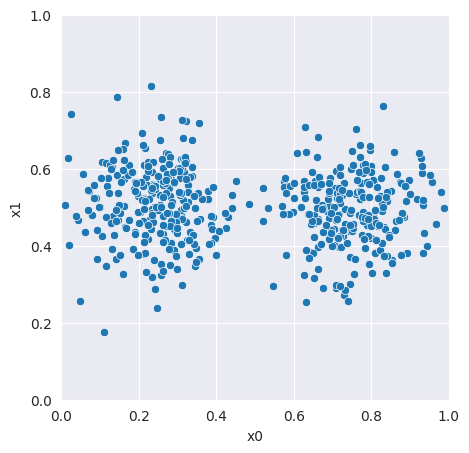

In [8]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', data=data_1)
plt.xlim(0, 1); plt.ylim(0, 1);


## Fit and Evaluate

starting fit to data..
fit complete.. 
 number of its: 3 
 time: 0.0288s
Silhouette Score: 0.672
Distortion: 0.684


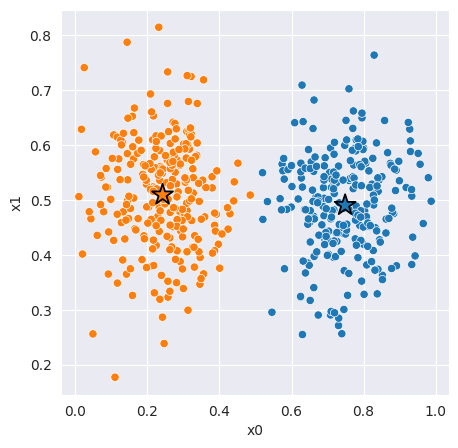

In [9]:

# Fit Model 
X = data_1[['x0', 'x1']]
ks = np.arange(1, 6)
wss = km.kmeans_tester(X, ks)
model_1 = km.KMeans(X, 2) # <-- Should work with default constructor  
model_1.fit()

# Compute Silhouette Score 
z = model_1.predict(X)

print(f'Silhouette Score: {km.euclidean_silhouette(X, z) :.3f}')
print(f'Distortion: {km.euclidean_distortion(X, z) :.3f}')

# Plot cluster assignments
C = model_1.get_centroids()
K = len(C)
_, ax = plt.subplots(figsize=(5, 5), dpi=100)
sns.scatterplot(x='x0', y='x1', hue=z, hue_order=range(K), palette='tab10', data=X, ax=ax);
sns.scatterplot(x=C[:,0], y=C[:,1], hue=range(K), palette='tab10', marker='*', s=250, edgecolor='black', ax=ax)
ax.legend().remove();
plt.savefig("cluster_result.png")


## [2] Second Dataset


### [2.1] Load Data


In [10]:
data_2 = pd.read_csv('data_2.csv')
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,800.0,46.788514,28.444733,-3.997498,23.358189,45.548783,63.753638,110.968060
x1,800.0,5.179252,3.350627,-0.951290,1.713055,6.463184,7.780812,11.562562


### [2.2] Visualize Data

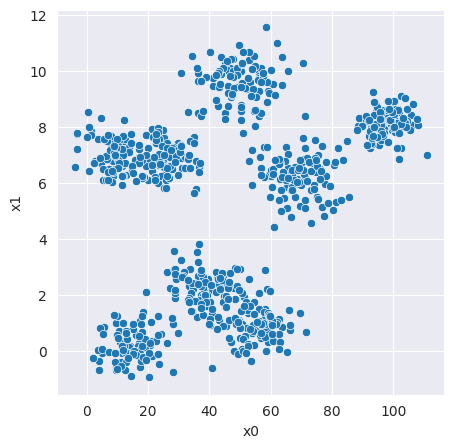

In [11]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x0', y='x1', data=data_2);

### [2.3] Fit and Evaluate 

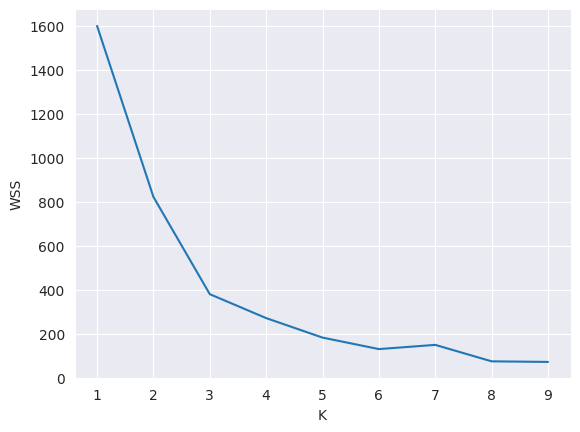

In [12]:
X = data_2[['x0', 'x1']]
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #normalizing dataset
ks = np.arange(1, 10)
wss = km.kmeans_tester(X, ks)
plt.plot(ks, wss)
plt.xlabel("K")
plt.ylabel("WSS")
plt.savefig("wss_data2.png")

starting fit to data..
fit complete.. 
 number of its: 10 
 time: 0.24505s
Distortion: 9.745
Silhouette Score: 0.634


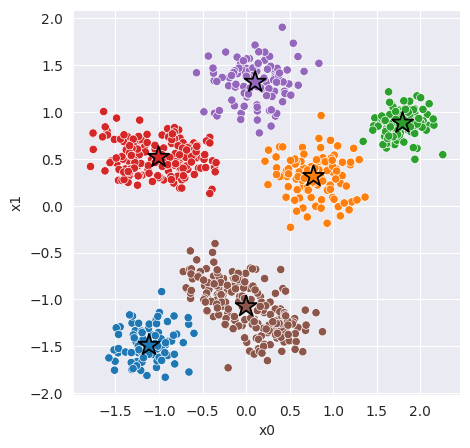

In [31]:
# Fit Model 
model_2 = km.KMeans(X, 6)  # <-- Feel free to add hyperparameters 
model_2.fit()

# Compute Silhouette Score 
z = model_2.predict(X)
print(f'Distortion: {km.euclidean_distortion(X, z) :.3f}')
print(f'Silhouette Score: {km.euclidean_silhouette(X, z) :.3f}')

# Plot cluster assignments
C = model_2.centroids
K = len(C)
_, ax = plt.subplots(figsize=(5, 5), dpi=100)
sns.scatterplot(x='x0', y='x1', hue=z, hue_order=range(K), palette='tab10', data=X, ax=ax);
sns.scatterplot(x=C[:,0], y=C[:,1], hue=range(K), palette='tab10', marker='*', s=250, edgecolor='black', ax=ax)
ax.legend().remove();
plt.savefig("cluster_result2.png")